In [76]:
import numpy as np
import mne 
import scipy 
#%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [77]:
import cv2

In [78]:
sec=5
video_path='../../../np.mp4'

In [79]:
def get_frame(video_path, sec):
    
    calc_timestamps = [0.0]
    cap = cv2.VideoCapture( video_path)
    timestamps = [cap.get(cv2.CAP_PROP_POS_MSEC)]
    fps = cap.get(cv2.CAP_PROP_FPS)

    while(cap.isOpened()):
        frame_exists, curr_frame = cap.read()
        #print(np.sum(curr_frame))
        #print('lol')
        if frame_exists:
            timestamps = cap.get(cv2.CAP_PROP_POS_MSEC)
            calc_timestamps.append(calc_timestamps[-1] + 1000/fps)
            ts=calc_timestamps[-1] + 1000/fps
            
            if sec<(ts/1000):
                print(ts/1000)
                #print('ghl;', np.sum(curr_frame))
                plt.figure()
                plt.imshow(curr_frame)
                break

In [80]:
#fps = vcap.get(cv2.CV_CAP_PROP_FPS)

def get_frmae(video_path, second):
    '''function probably is incorrect but it seemed to wors as get_frame'''
    
    #start=20
    
    vcap = cv2.VideoCapture( video_path)
    ret, frame = vcap.read()
    #fps = vcap.get(cv2.CAP_PROP_FPS)
    #times 1/24
    
    frame_num=int(second*24)

    for i in range(frame_num):
        #vcap = cv2.VideoCapture('../../../ks.mp4')
        ret, frame = vcap.read()
    #plt.close()
    print(second)
    print(i)
    plt.figure()
    plt.imshow(frame)



In [6]:
raw_data=mne.io.read_raw_brainvision('../../np/NeoRec_2022-12-09_13-26-12.vhdr', preload=True)

Extracting parameters from ../../np/NeoRec_2022-12-09_13-26-12.vhdr...
Setting channel info structure...
Reading 0 ... 1851567  =      0.000 ...   925.784 secs...


In [7]:
events,ids=mne.events_from_annotations(raw_data)

Used Annotations descriptions: ['1/Event', 'New Segment/']


In [8]:
raw_data.crop(events[-1,0]/raw_data.info['sfreq'], None)

<RawBrainVision | NeoRec_2022-12-09_13-26-12.eeg, 15 x 1843191 (921.6 s), ~211.0 MB, data loaded>

Using matplotlib as 2D backend.


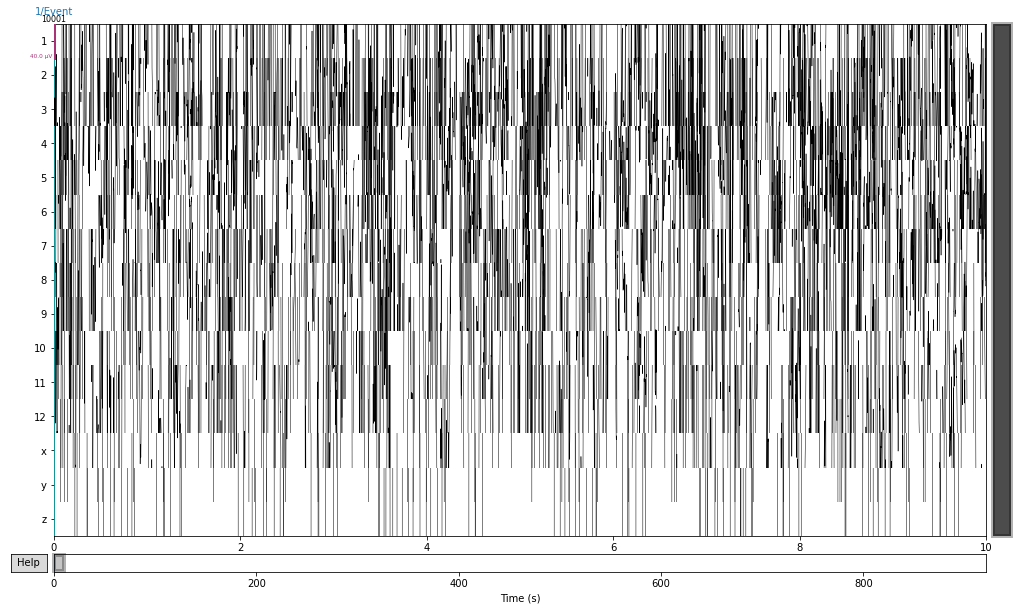

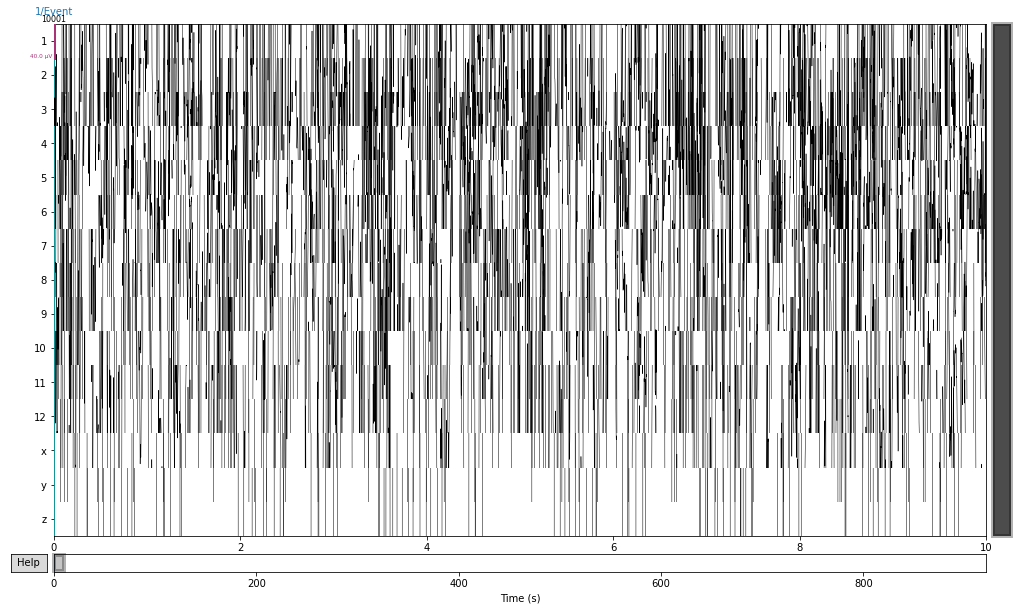

In [9]:
raw_data.plot(events)

In [10]:
raw_data.ch_names

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', 'x', 'y', 'z']

In [11]:
#Extract only accelerometry data
raw_data_acc=raw_data.copy().drop_channels(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'])

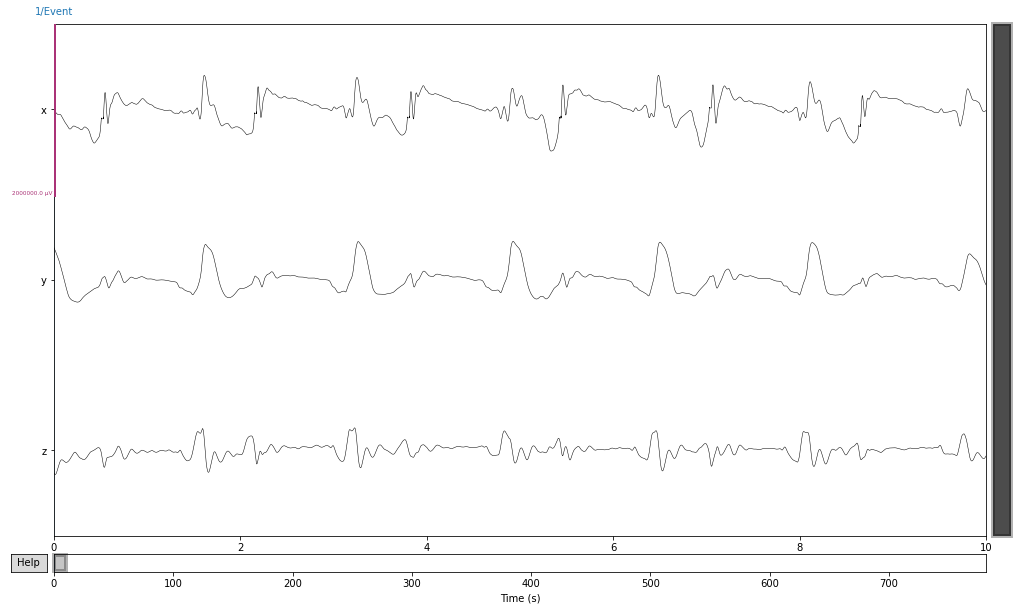

In [33]:
raw_data_acc.plot(scalings={'eeg':0.1e1})
plt.show()

In [12]:
#taking the matrix of accelerometry data
xyz=raw_data_acc.get_data()


In [13]:
#we working with y axes becaise it is the best one
y_data=xyz[1,:]

In [16]:

start=200
period=3300
end=start+period


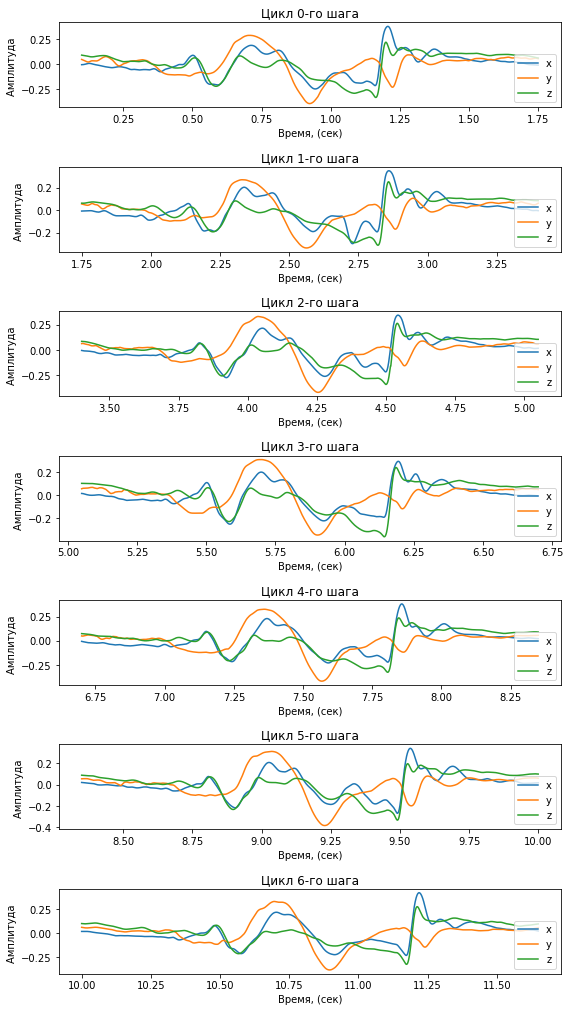

In [17]:
'''
plot several cycles to check how acc data looks like
'''

plt.close()

cycles=7

fig,ax=plt.subplots(cycles,1, figsize=(9,2.5*cycles))
plt.subplots_adjust(hspace=0.7)

for i in range(cycles):
    ax[i].plot( np.arange(start+period*i,end+period*i)/raw_data.info['sfreq'],  xyz[:,start+period*i:end+period*i].T  , label=['x', 'y', 'z'])
    ax[i].set_title('Цикл '+str(i)+'-го шага')
    ax[i].set_xlabel('Время, (сек)')
    ax[i].set_ylabel('Амплитуда ')
    ax[i].legend(loc='lower right')


In [18]:
def find_peaks(array_, koef=1.1, max_flg=False):

    mean_=np.mean(array_)
    std_=np.std(array_)

    max_=mean_+koef*std_
    min_=mean_-koef*std_

    max_array_=[max_]*len(array_)
    min_array_=[min_]*len(array_)

    inds=np.where(array_>max_)[0]
    
    if max_flg:
        return inds, max_
    
    else:
        return inds
    
    
def find_peaks_min(array_, koef=1.1, max_flg=False):

    mean_=np.mean(array_)
    std_=np.std(array_)

    max_=mean_+koef*std_
    min_=mean_-koef*std_

    max_array_=[max_]*len(array_)
    min_array_=[min_]*len(array_)

    inds=np.where(array_<min_)[0]
    
    if max_flg:
        return inds, min_
    
    else:
        return inds
    
def reduce_peaks(marks_array_inds,  threhold, with_log=False,):
    
    new_marks_array_inds=[marks_array_inds[0]]
    for i in range(1,len(marks_array_inds)):
        if marks_array_inds[i]-new_marks_array_inds[-1]<threhold:
            if with_log:
                print(i)
        else:
            new_marks_array_inds.append(marks_array_inds[i])

    return new_marks_array_inds


In [19]:
#extracting peak of y acceletimetry 
inds=find_peaks(y_data,1.7)

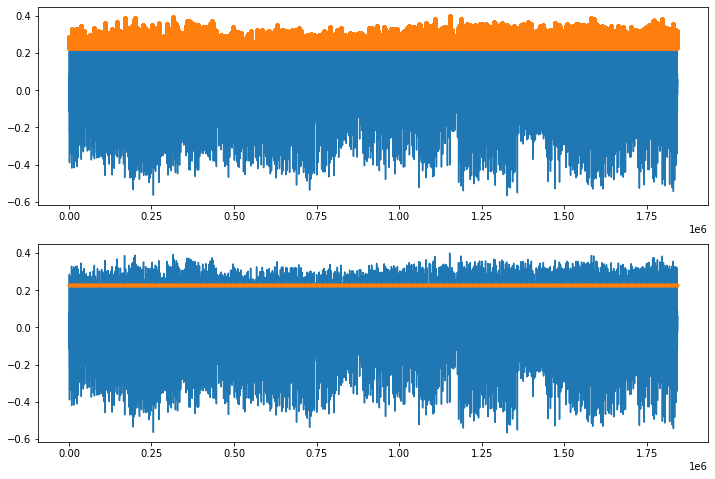

In [20]:
plt.close()
fig,ax=plt.subplots(2,1, figsize=(12,8))
ax[0].plot(y_data)
ax[0].plot(inds,y_data[inds], '.')


new_peaks=reduce_peaks(inds, 2000) #reducing its number
ax[1].plot(y_data)
ax[1].plot(new_peaks,y_data[new_peaks], '.')

In [21]:
%matplotlib qt5

In [22]:
events_max=np.array(new_peaks)+raw_data.first_samp

In [33]:

zeros=[0]*len(events_max)
marks=[1]*len(events_max)

ones=np.vstack([events_max,zeros,marks]).T


zeros=[0]*len(events_max)
marks=[2]*len(events_max)
twos=events_max+600

twos=np.vstack([twos,zeros,marks]).T




In [34]:
ones

array([[   9694,       0,       1],
       [  12960,       0,       1],
       [  16333,       0,       1],
       ...,
       [1841931,       0,       1],
       [1845677,       0,       1],
       [1849430,       0,       1]])

In [35]:
len(ones)
len(twos)

527

In [36]:
events=np.vstack([ones,twos])
events=events[events[:, 0].argsort()]
events[:,0]=events[:,0]#+raw_data.first_samp

In [37]:
raw_data.first_samp

8377

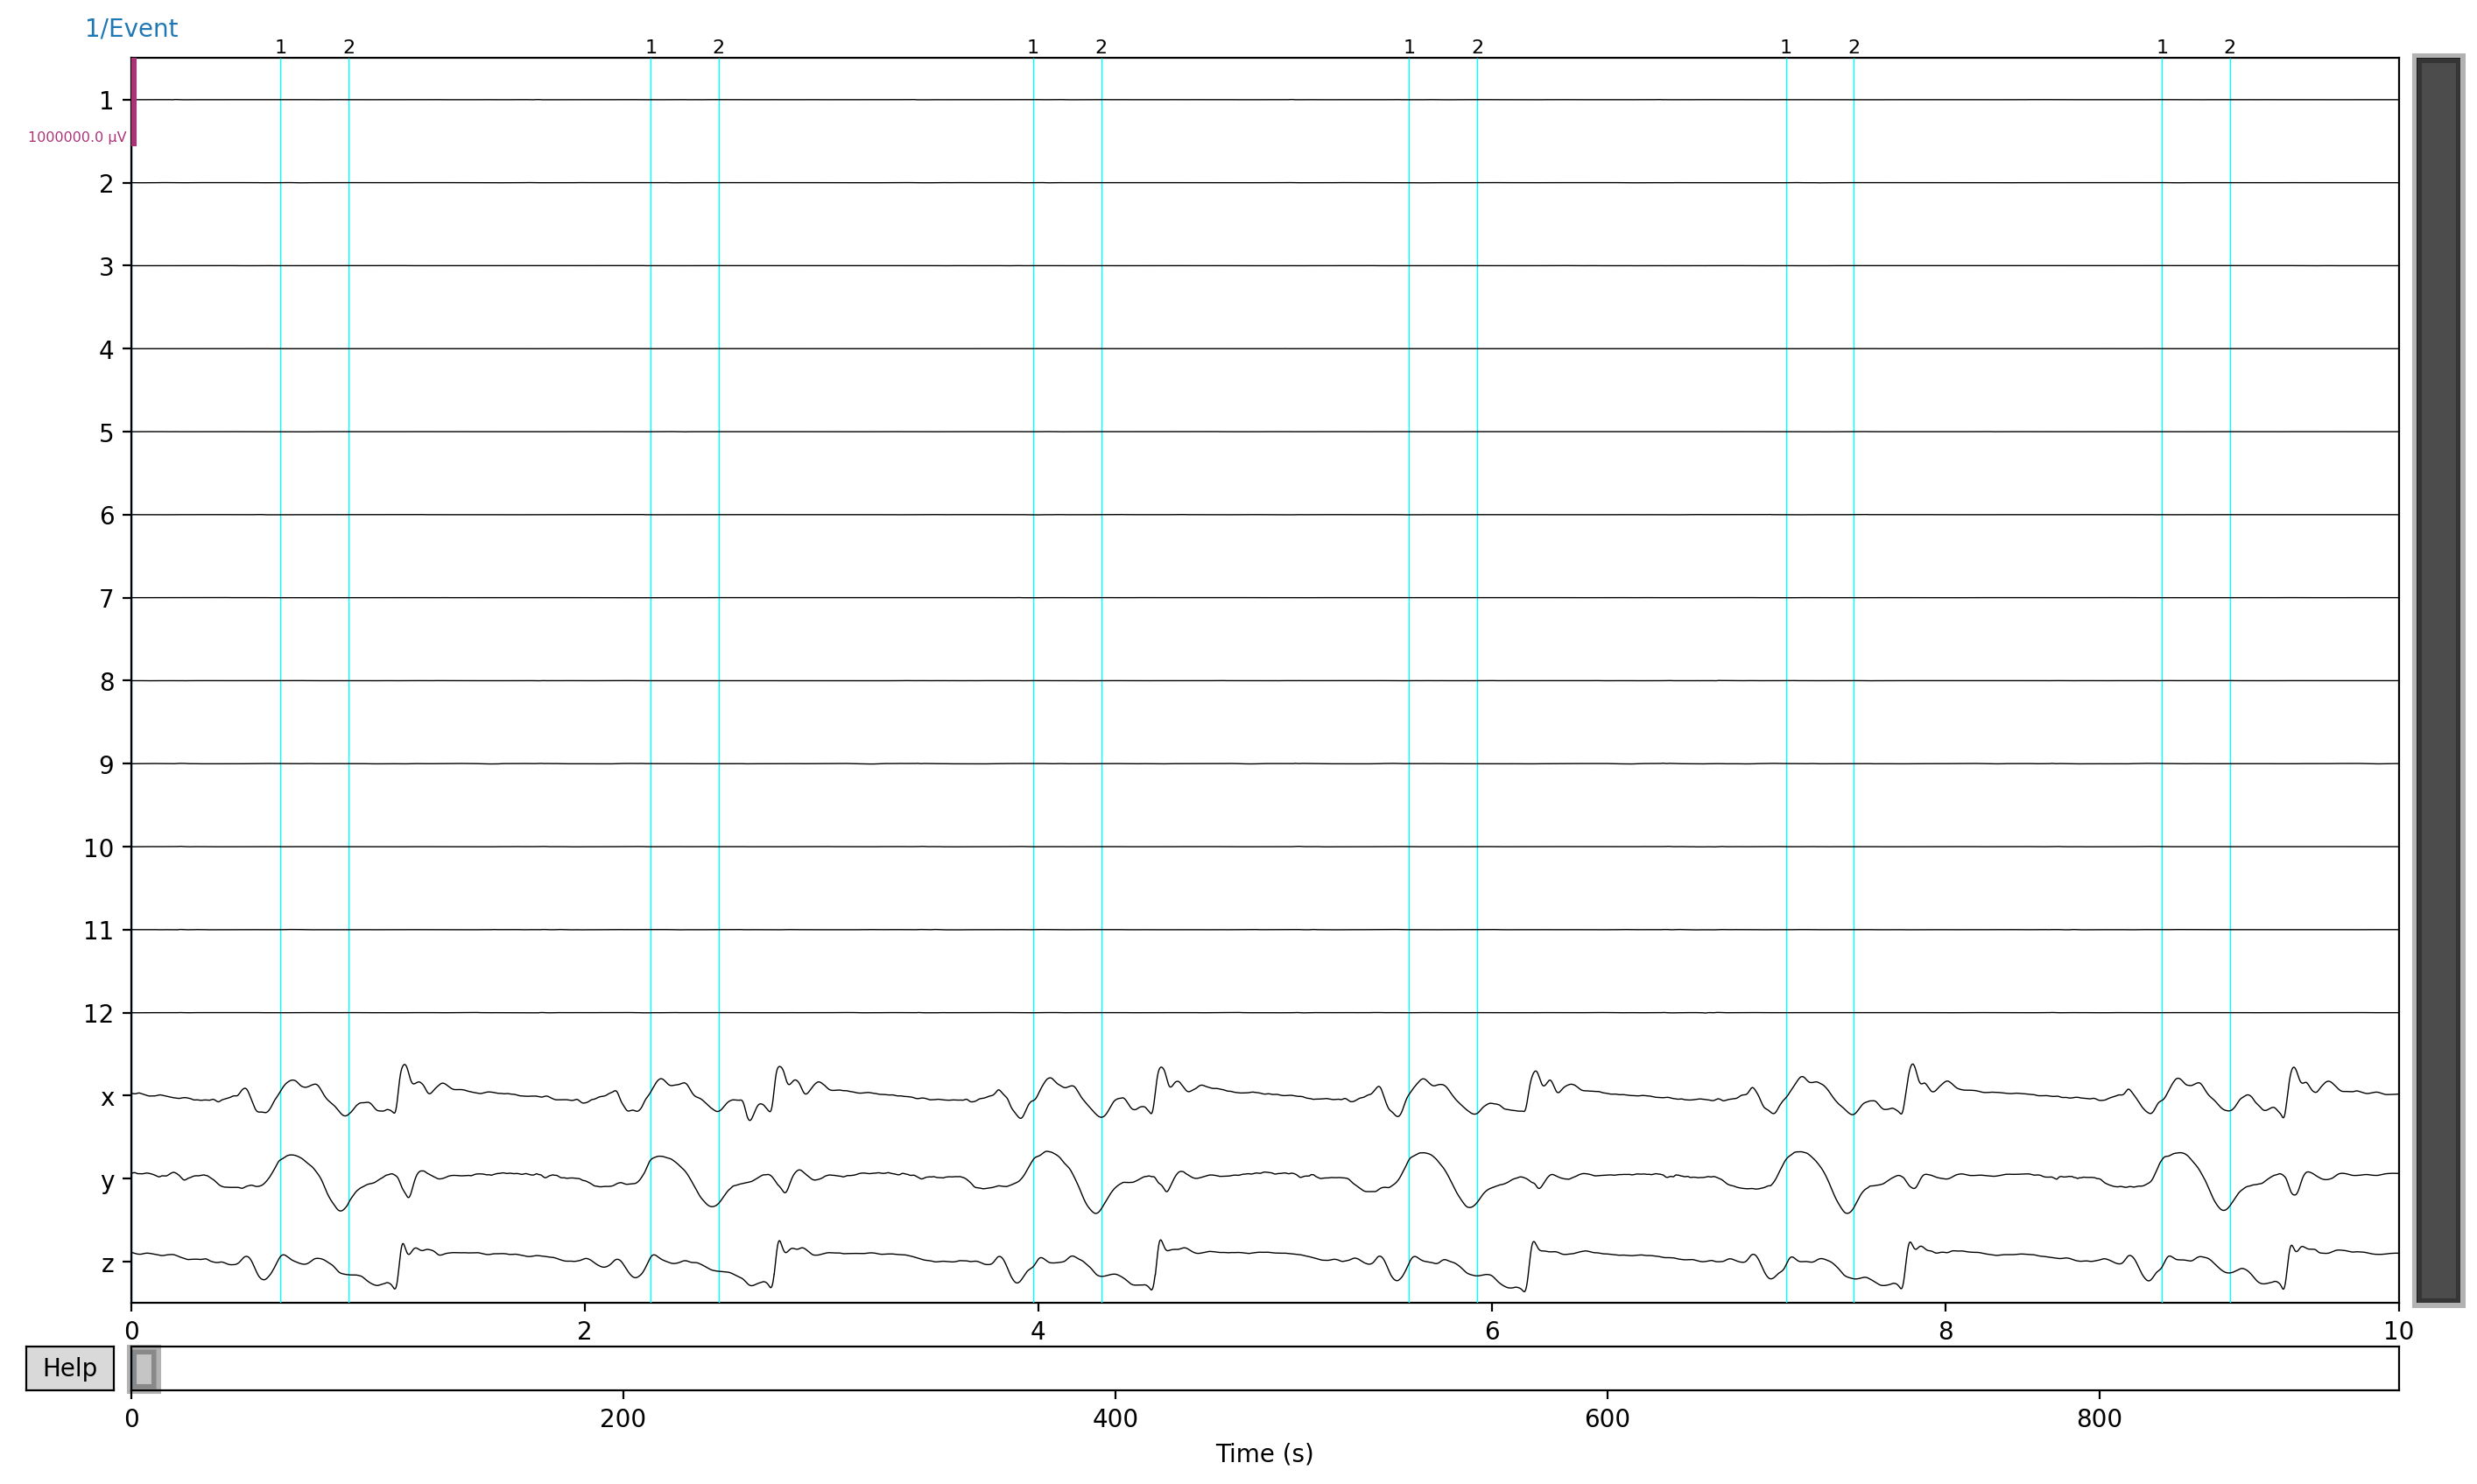

Channels marked as bad: none


In [38]:
raw_data.plot(events,scalings={'eeg':5e-1})

In [39]:
for ind in np.arange(1,40,5):
    
    s=( (ones[ind,0]-raw_data.first_samp)/raw_data.info['sfreq'])
    print(s)
    get_frame(video_path,s)
    
    
    s=( (twos[ind,0]-raw_data.first_samp)/raw_data.info['sfreq'])
    print(s)
    get_frame(video_path,s)
    
    plt.figure()
    print((ones[ind,0])-2000-raw_data.first_samp)
    plt.plot(y_data[(ones[ind,0])-2000-raw_data.first_samp:(ones[ind,0])+2000-raw_data.first_samp] )
    plt.scatter(2001,y_data[ (ones[:,0])[ind]-raw_data.first_samp])


2.2915
2.302299999999998
2.5915
2.602599999999999
2583
10.6355
10.643966666666694
10.9355
10.944266666666696
19271
18.5435
18.551866666666605
18.8435
18.85216666666659
35087
27.8645
27.8945333333328
28.1645
28.194833333332785
53729
35.351
35.36866666666603
35.651
35.66896666666605
68702
43.2735
43.27656666666649
43.5735
43.57686666666651
84547
52.746
52.752700000000374
53.046
53.053000000000395
103492
60.6985


/var/folders/2m/6g8qzjcd00n9j42dqh2ndj780000gn/T/ipykernel_26639/610006455.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


60.72733333333417
60.9985
61.02763333333419
119397


In [40]:
raw_data_emg=raw_data.copy().drop_channels(['x','y','z'])


SAMPLING_FREQUENCY = raw_data_emg.info['sfreq']
CHANNEL_NUMBER = len(raw_data_emg.ch_names)
BANDPASS_LIMITS = (200, 500)

In [41]:
raw_hil = raw_data_emg.copy().filter(BANDPASS_LIMITS[0], BANDPASS_LIMITS[1]).apply_hilbert(envelope=True).filter(0, 20)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2e+02 - 5e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 200.00
- Lower transition bandwidth: 50.00 Hz (-6 dB cutoff frequency: 175.00 Hz)
- Upper passband edge: 500.00 Hz
- Upper transition bandwidth: 125.00 Hz (-6 dB cutoff frequency: 562.50 Hz)
- Filter length: 133 samples (0.067 sec)

Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter l

In [42]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib

def conf_matrix_plot(categs, matrix_bef, size=3,perc_flg=True):
    
    group_percentages = ["{0:.2%}".format(value) for value in
                     matrix_bef.flatten()/np.sum(matrix_bef)]
    
    if perc_flg:
        labels = np.asarray(group_percentages).reshape(size,size)
    else:
        labels =matrix_bef
    sns.set_style("darkgrid", {"axes.facecolor": "0.9"})
    matplotlib.rcParams.update({'font.size': 32})
    fig1, ax1 = plt.subplots(figsize=[10,8])
    sns.heatmap(matrix_bef,cmap='Blues',xticklabels=categs,yticklabels=categs,annot=labels, fmt='',ax=ax1)

    #matplotlib.rcParams.update({'font.size': defa})

In [43]:
epochs=mne.Epochs(raw_hil, events=events, tmin=-0.5, tmax=0.0, 
                        preload=True, 
                        baseline=None).apply_hilbert(envelope=True)

Not setting metadata
Not setting metadata
1054 matching events found
No baseline correction applied
0 projection items activated
Loading data for 1054 events and 1001 original time points ...
0 bad epochs dropped


In [44]:
epochs

Number of events,1054
Events,1: 5272: 527
Time range,-0.500 – 0.000 sec
Baseline,off


In [45]:
def get_features_labels(epochs):
    X=[]
    for i in range(epochs._data.shape[0]):
        channel_names = np.arange(CHANNEL_NUMBER).astype(str).tolist()
        channel_types = ['emg']*CHANNEL_NUMBER
        info = mne.create_info(channel_names, SAMPLING_FREQUENCY, channel_types)
        raw = mne.io.RawArray(epochs._data[i], info, verbose=False)
        raw.filter(BANDPASS_LIMITS[0], BANDPASS_LIMITS[1], picks=['emg'], n_jobs=4)
        x__=[]
        # Mean absolute value
        for channel in raw.get_data():
            x__.append(channel.mean())
        # Matematical expactation
        for channel in raw.get_data():
            x__.append(channel.std())
        # Variance
        for channel in raw.get_data():
            x__.append(channel.var())
        # Waveform length
        for channel in raw.get_data():
            x__.append(np.sum(np.diff(channel, n=1)))
        # Number pf peaks
        for channel in raw.get_data():
            x__.append(len(find_peaks(channel)))
        
        # Append PCA of epoch data
        pca = PCA(6)
        pv = pca.fit_transform(epochs._data[i])
                         
        X.append(x__)
    X = np.array(X).squeeze()
    y = epochs.events[:,-1].flatten()
    return X, y


In [46]:

X, y = get_features_labels(epochs)

print('X: ', X.shape)
print('Y: ', y.shape)
#classifier = SVC(C=0.8, kernel='rbf', probability=True)
# cross_val_score(classifier, X, y, cv=3)
#classifier.fit(X, y)
#classifier.score(X, y)

X:  (1054, 60)
Y:  (1054,)


In [47]:
classifier = SVC(C=0.8, kernel='rbf', probability=True)
#cross_val_score(classifier, X, y, cv=3)
classifier.fit(X, y)
classifier.score(X, y)

0.905123339658444

In [48]:
tscv=TimeSeriesSplit(max_train_size=None, n_splits=4)

ac_list=[]

for train_index, test_index in tscv.split(X):
    print()
    #print("TRAIN:", train_index, "TEST:", test_index) 
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    print("TRAIN:", X_train.shape,y_train.shape )
    print("TEST:", X_test.shape, y_test.shape) 
    
    
    classifier.fit(X_train, y_train)
    ac=classifier.score(X_test, y_test)
    print('Accuracy:', ac)
    
    ac_list.append(ac)
    
    #matrix=confusion_matrix(y_test,preds)
    
    preds=classifier.predict(X_test)
    matrix=confusion_matrix(y_test,preds)
    #plt.
    
    #conf_matrix_plot(categs, matrix)
    #conf_matrix_plot(categs, matrix , perc_flg=False)
    
    categs=['Фаза-1','Фаза-2']
    conf_matrix_plot(categs, matrix,2)
    conf_matrix_plot(categs, matrix ,2, perc_flg=False)
    


TRAIN: (214, 60) (214,)
TEST: (210, 60) (210,)
Accuracy: 0.8904761904761904

TRAIN: (424, 60) (424,)
TEST: (210, 60) (210,)
Accuracy: 0.9

TRAIN: (634, 60) (634,)
TEST: (210, 60) (210,)
Accuracy: 0.8952380952380953

TRAIN: (844, 60) (844,)
TEST: (210, 60) (210,)
Accuracy: 0.8857142857142857


In [49]:
ac_list

[0.8904761904761904, 0.9, 0.8952380952380953, 0.8857142857142857]

In [50]:
plt.figure()
plt.plot(np.arange(4),ac_list, 'g.-')
plt.xlabel('Тестируемая выборка')
plt.ylabel('Точность предсказания')
plt.xticks(np.arange(4), ['1-ая четверть', '2-ая четверть', '3-ая четверть','4-ая четверть'])
plt.grid()

In [51]:
zeros=[0]*len(events_max)
marks=[3]*len(events_max)

threes=np.vstack([np.array(events_max)+1500,zeros,marks]).T

#twos=np.vstack([events_max,zeros,marks]).T



In [52]:
events=np.vstack([ones,twos, threes]) 
events=events[events[:, 0].argsort()]
events[:,0]=events[:,0]#-raw_data.first_samp


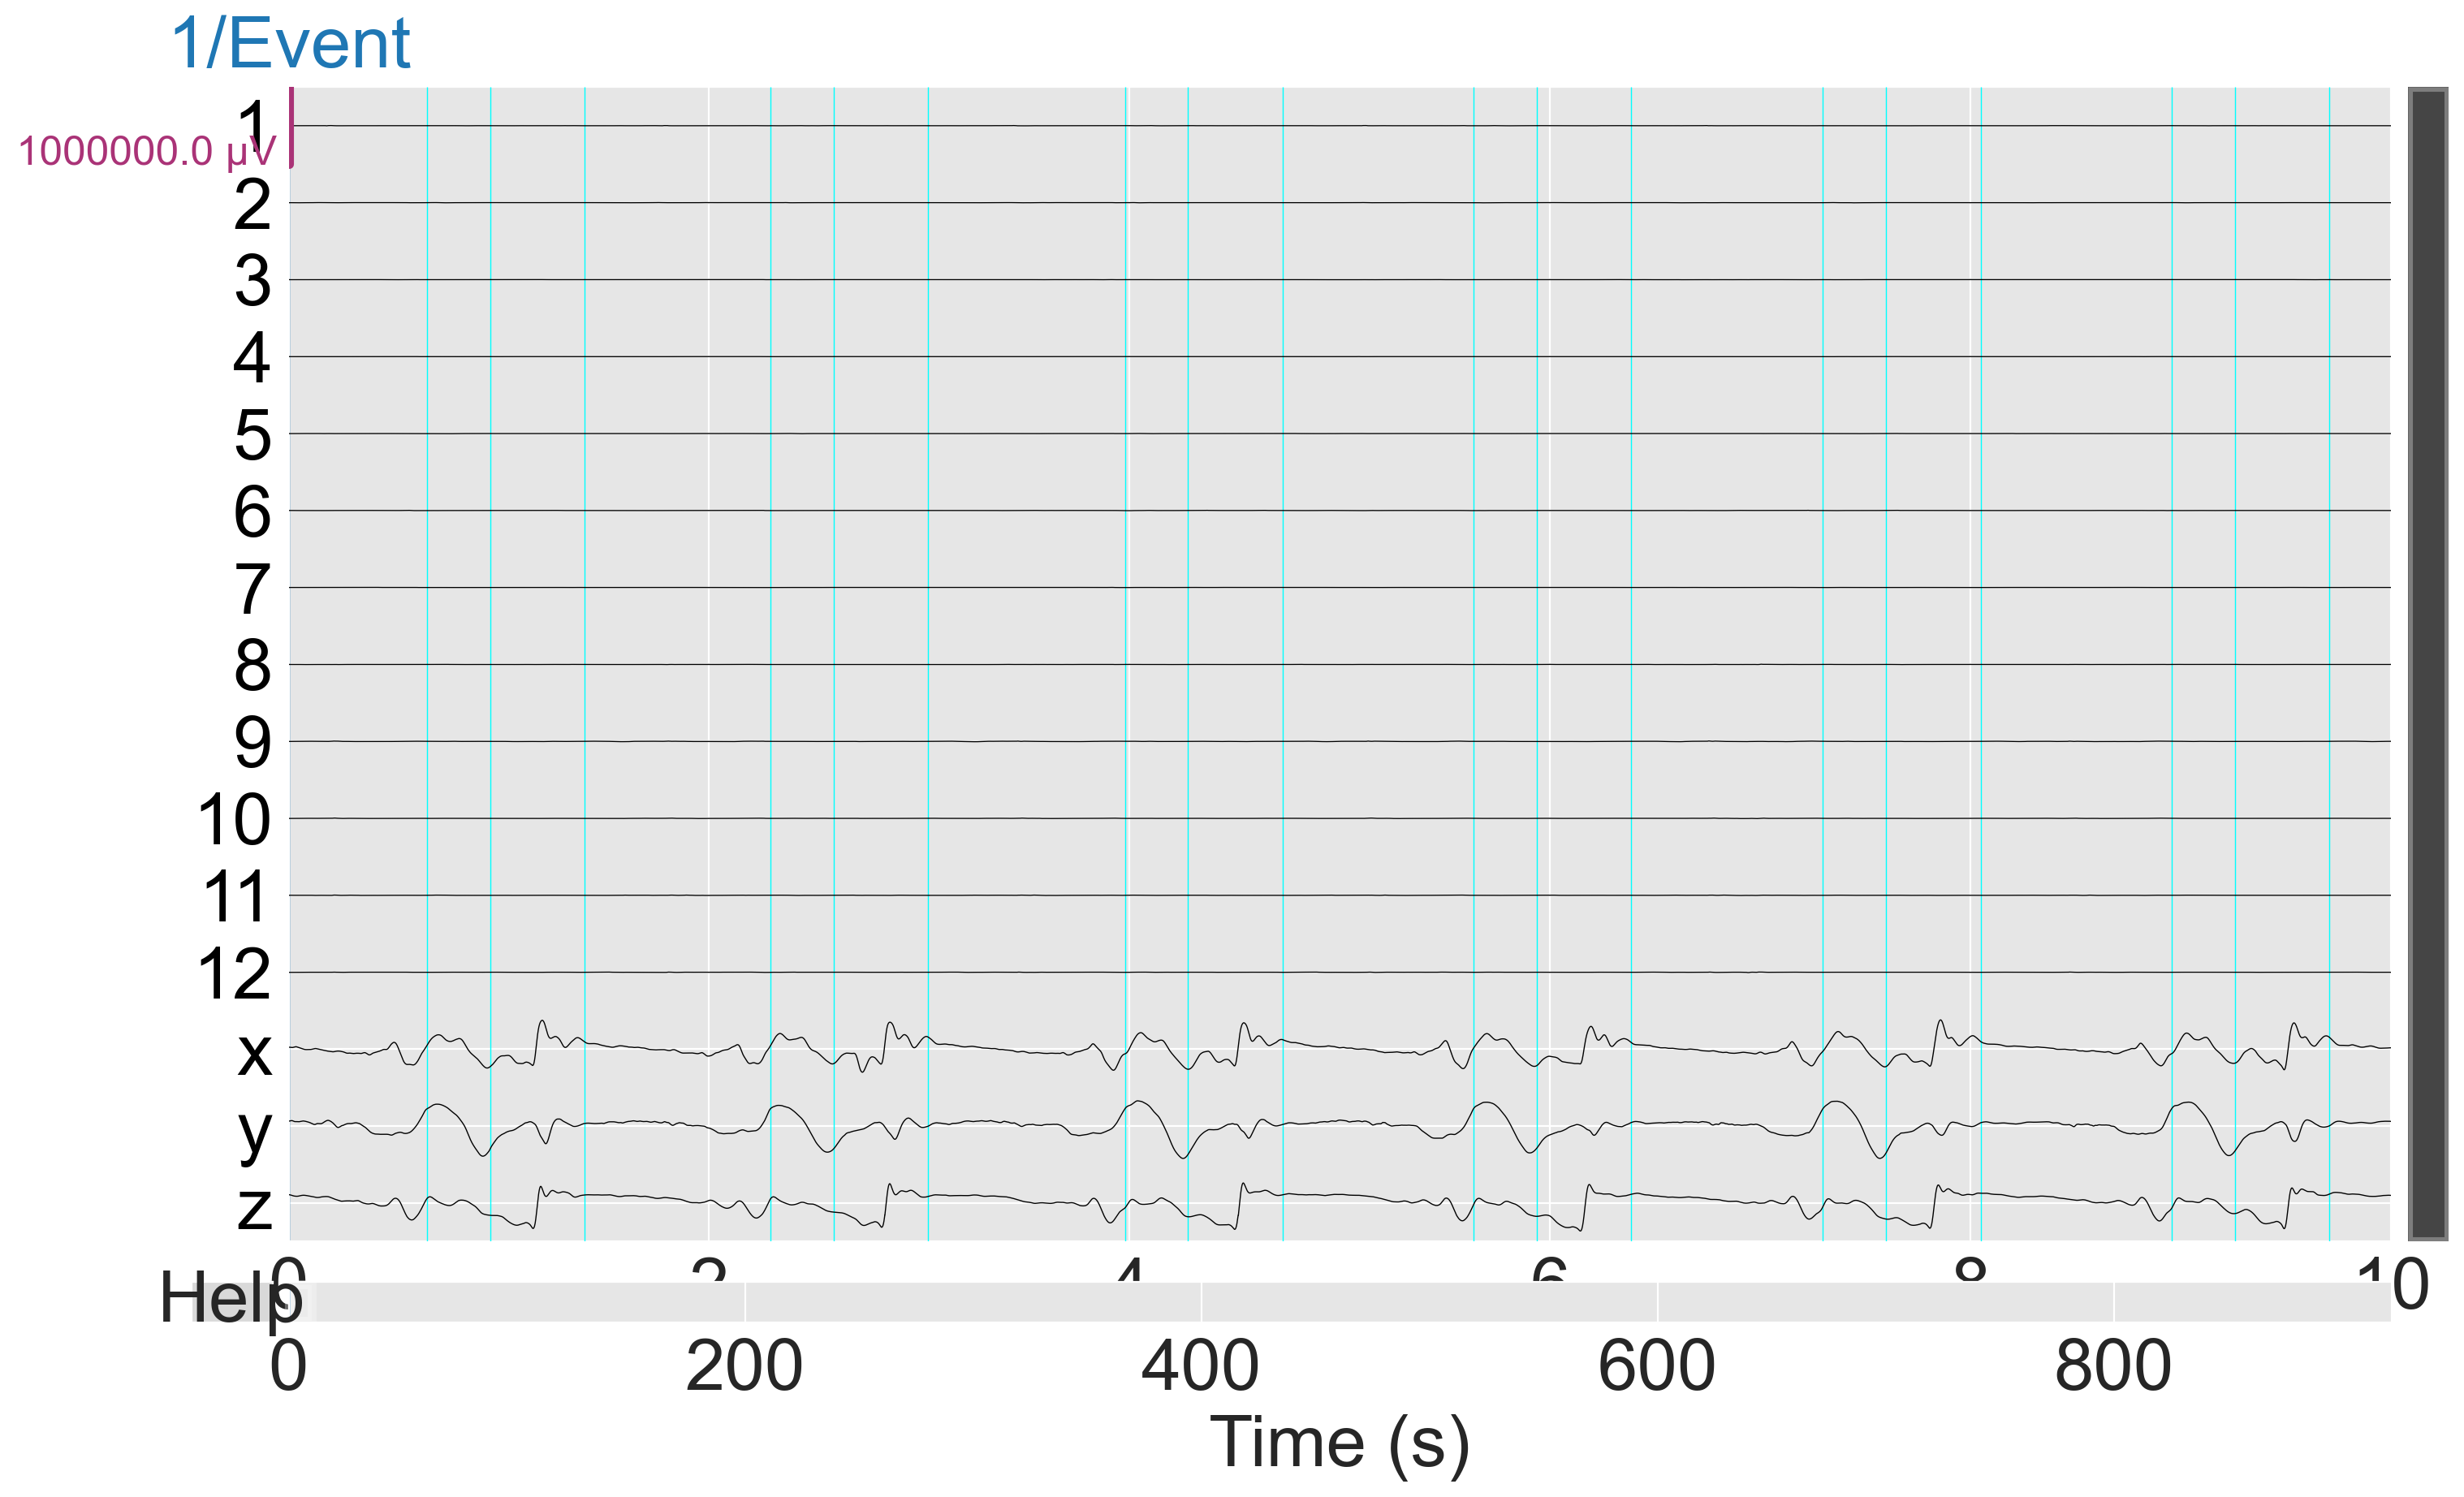

In [53]:
raw_data.plot(events,scalings={'eeg':5e-1})

In [54]:
zeros=[0]*len(events_max)
marks=[4]*len(events_max)

fores=np.vstack([np.array(events_max)+2000,zeros,marks]).T

#twos=np.vstack([events_max,zeros,marks]).T




In [55]:

events=np.vstack([ones,twos, threes, fores])
events=events[events[:, 0].argsort()]


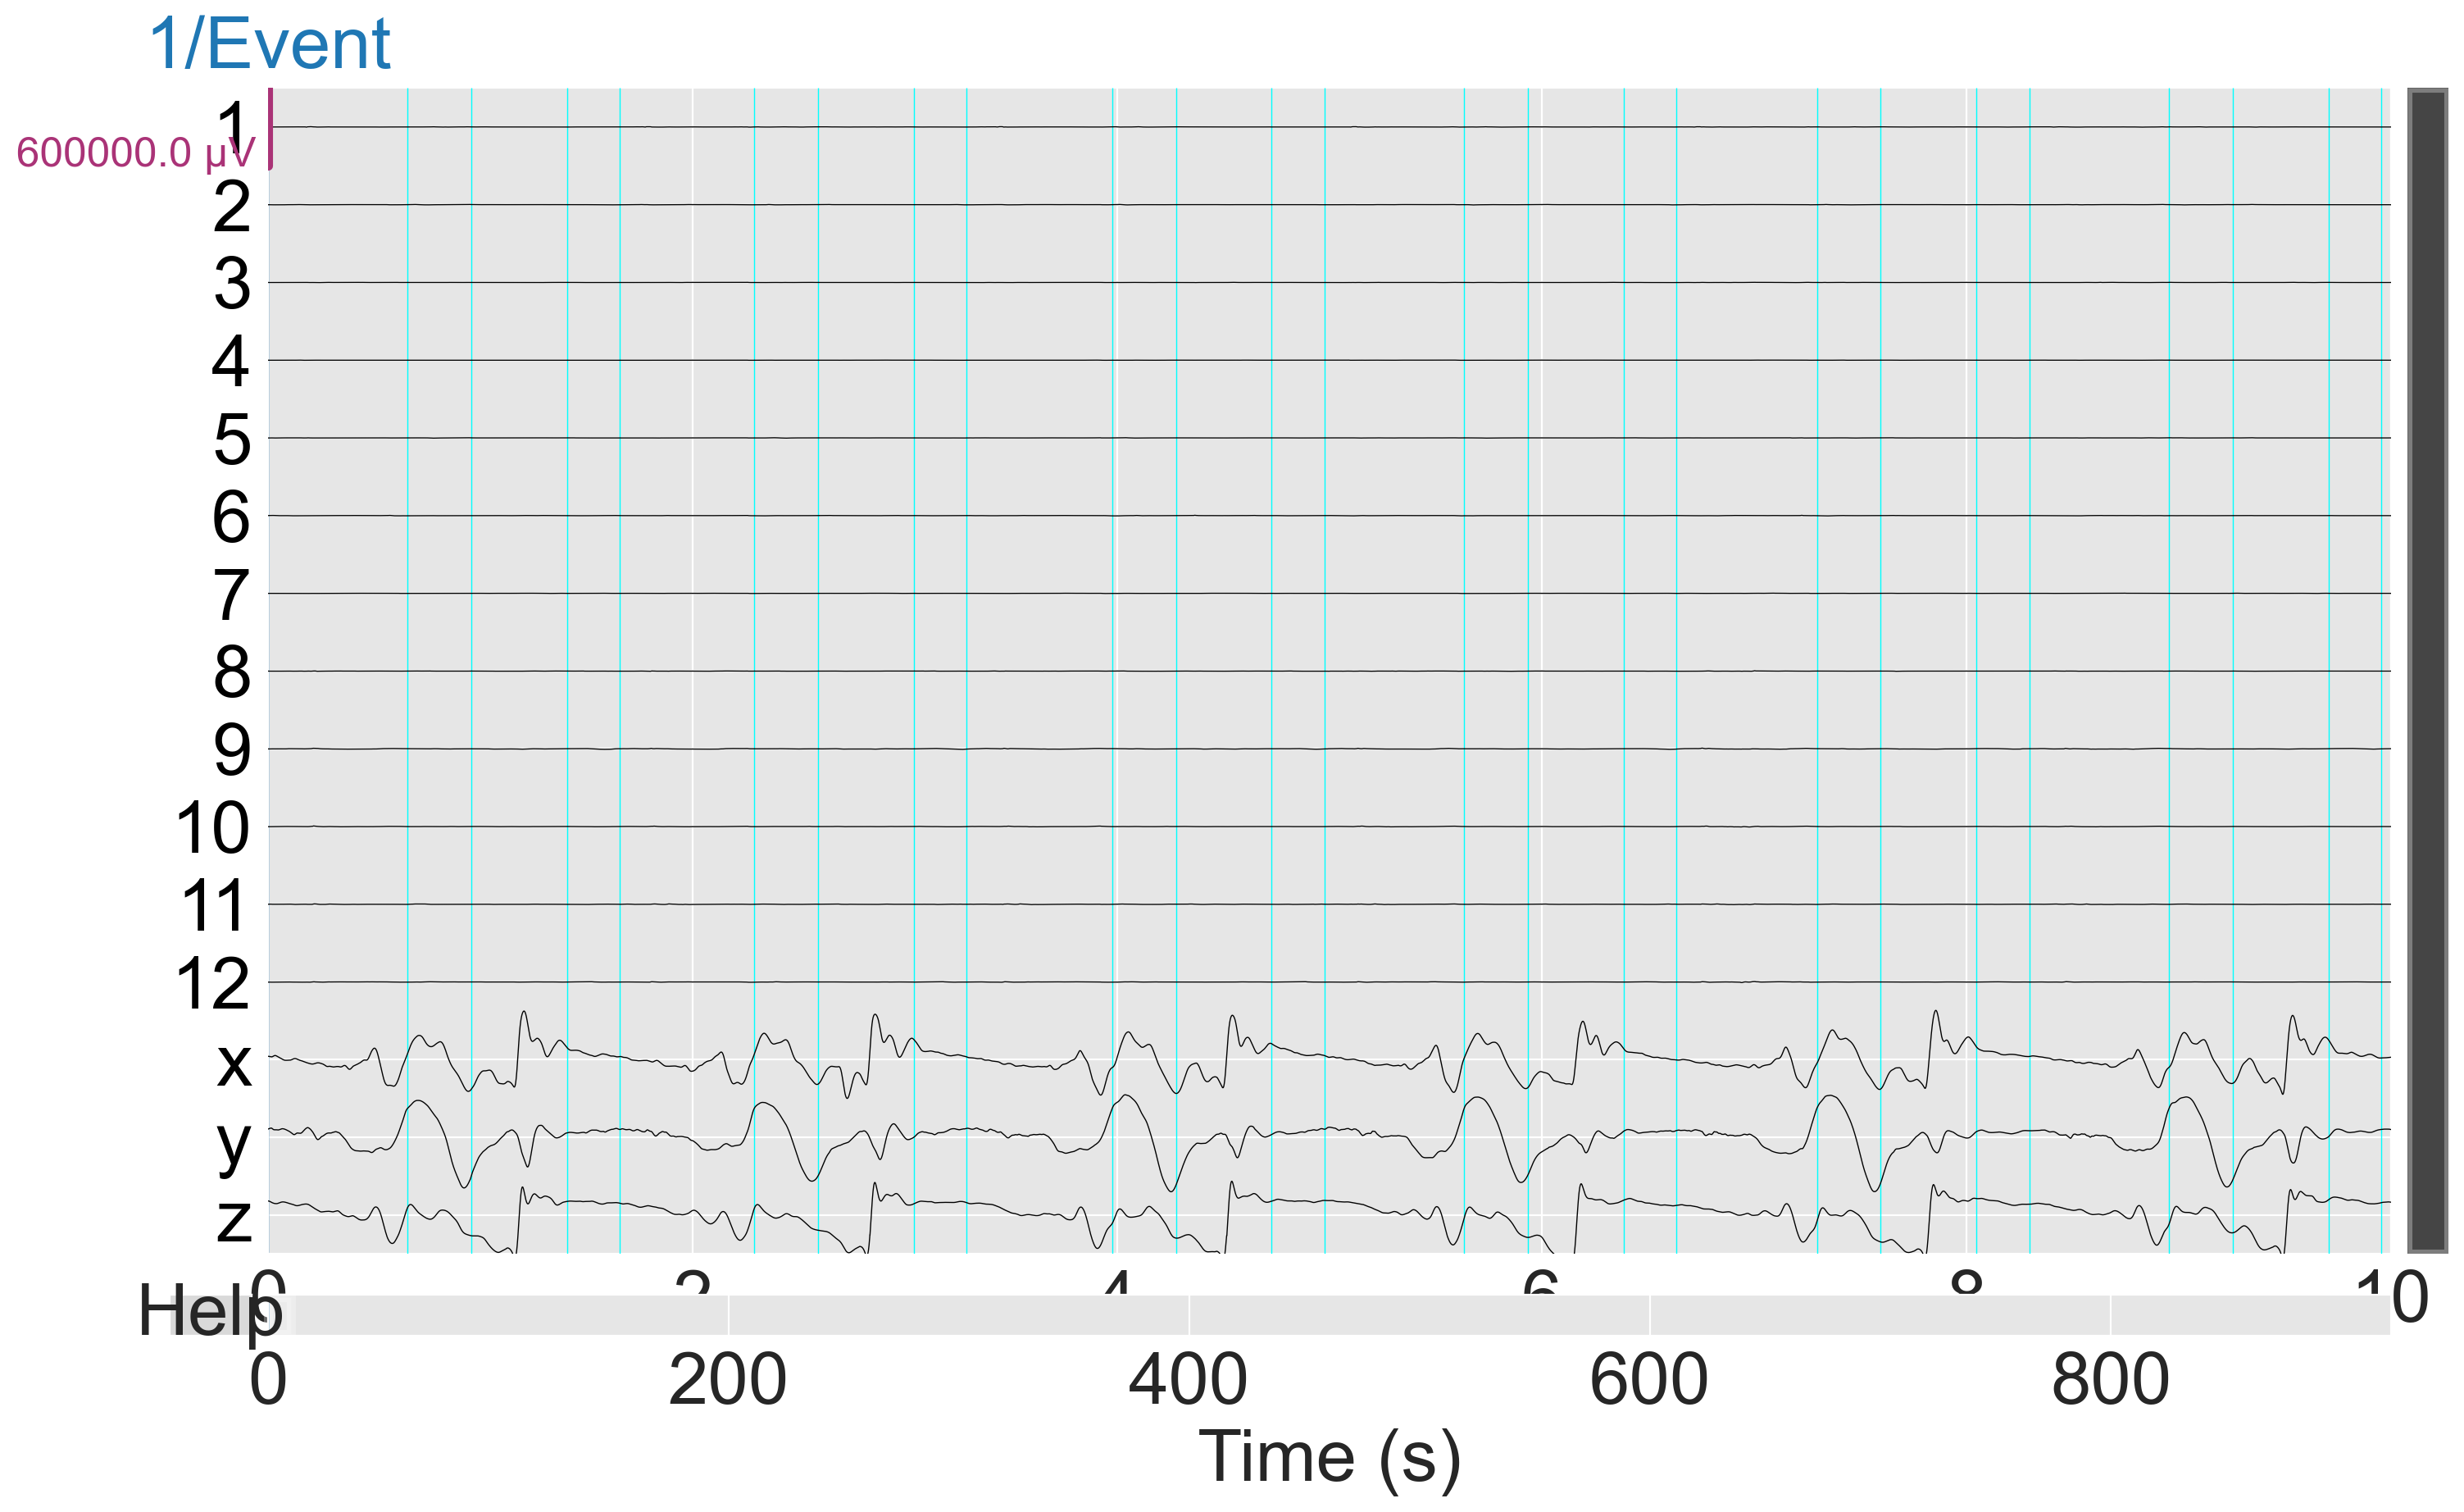

In [56]:
raw_data.plot(events,scalings={'eeg':0.3e0})

In [57]:
print((ones[:,0]/raw_data.info['sfreq'])[:1])#приземление на пятку
print((twos[:,0]/raw_data.info['sfreq'])[:1])#отрыв пятки 
print((threes[:,0]/raw_data.info['sfreq'])[:1])#опопа на пятку 
print((fores[:,0]/raw_data.info['sfreq'])[:1])

[4.847]
[5.147]
[5.597]
[5.847]


In [59]:
#fps = vcap.get(cv2.CV_CAP_PROP_FPS)

video_path='../../../np.mp4'


In [61]:
ind=40

s=( (ones[ind,0]-raw_data.first_samp)/raw_data.info['sfreq'])
print(s)
get_frame(video_path,s)

s=( (twos[ind,0]-raw_data.first_samp)/raw_data.info['sfreq'])
print(s)
get_frame(video_path,s)


s=( (threes[ind,0]-raw_data.first_samp)/raw_data.info['sfreq'])
print(s)
get_frame(video_path,s)

s=( (fores[ind,0]-raw_data.first_samp)/raw_data.info['sfreq'])
print(s)
get_frame(video_path,s)


66.8265
66.83343333333453
67.1265
67.13373333333455
67.5765
67.60086666666791
67.8265
67.83443333333459
Channels marked as bad: none
Channels marked as bad: none


In [63]:
print(10)

10


In [70]:
epochs=mne.Epochs(raw_hil, events=events, tmin=-0.5, tmax=0.0, 
                        preload=True, 
                        baseline=None).apply_hilbert(envelope=True)

Not setting metadata
Not setting metadata
2108 matching events found
No baseline correction applied
0 projection items activated
Loading data for 2108 events and 801 original time points ...
0 bad epochs dropped


In [71]:

X, y = get_features_labels(epochs)

print('X: ', X.shape)
print('Y: ', y.shape)
#classifier = SVC(C=0.8, kernel='rbf', probability=True)
# cross_val_score(classifier, X, y, cv=3)
#classifier.fit(X, y)
#classifier.score(X, y)

X:  (2108, 60)
Y:  (2108,)


In [72]:
classifier = SVC(C=0.8, kernel='rbf', probability=True)
#cross_val_score(classifier, X, y, cv=3)
classifier.fit(X, y)
classifier.score(X, y)

0.5227703984819735

In [73]:
print(10)

10


In [74]:
categs=['Фаза-1','Фаза-2', 'Фаза-3', 'Фаза-4']

In [75]:
tscv=TimeSeriesSplit(max_train_size=None, n_splits=4)
for train_index, test_index in tscv.split(X):
    print()
    #print("TRAIN:", train_index, "TEST:", test_index) 
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    print("TRAIN:", X_train.shape,y_train.shape )
    print("TEST:", X_test.shape, y_test.shape) 
    
    
    classifier.fit(X_train, y_train)
    ac=classifier.score(X_test, y_test)
    print('Accuracy:', ac)
    
    
    preds=classifier.predict(X_test)
    matrix=confusion_matrix(y_test,preds)
    #plt.
    
    conf_matrix_plot(categs, matrix, size=4)
    conf_matrix_plot(categs, matrix , perc_flg=False,size=4)


TRAIN: (424, 60) (424,)
TEST: (421, 60) (421,)
Accuracy: 0.5130641330166271

TRAIN: (845, 60) (845,)
TEST: (421, 60) (421,)
Accuracy: 0.4085510688836104

TRAIN: (1266, 60) (1266,)
TEST: (421, 60) (421,)
Accuracy: 0.505938242280285

TRAIN: (1687, 60) (1687,)
TEST: (421, 60) (421,)
Accuracy: 0.5106888361045131
